# 1. Connect to google drive and load neccessary libraries

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install scanpy

     |████████████████████████████████| 2.0 MB 5.1 MB/s 
     |████████████████████████████████| 127 kB 53.3 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 1.1 MB 59.8 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=6ba2ae9188b6fa1c050d22608e45f9074620ad83c4e3b1385c1cd429b1f79343
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=a076e7c7fa7e33470234123e581bb391ece2025823d8e2c01c21fbbff03c3197
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=cd3df6712f12c8fee3e70fc03e5363ac560956b9f3c7462630436eea40c3623e
  Stored in directory: /root/.cache/

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.1 MB/s 
     |████████████████████████████████| 261 kB 46.1 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 271 kB 54.5 MB/s 
     |████████████████████████████████| 16.9 MB 88 kB/s 
     |████████████████████████████████| 167 kB 65.9 MB/s 
     |████████████████████████████████| 1.7 MB 70.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 60.9 MB/s 
     |████████████████████████████████| 2.0 MB 57.8 MB/s 
     |████████████████████████████████| 1.3 MB 63.0 MB/s 
     |████████████████████████████████| 6.8 MB 40.3 MB/s 
     |████████████████████████████████| 102 kB 11.4 MB/s 
     |████████████████████████████████| 596 kB 72.4 MB/s 
     |████████████████████████████████| 675 kB 75.9 MB/s 
     |█████████████████

In [ ]:
from pycaret.utils import version
version()

'2.3.4'

In [ ]:
import scanpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. load train data

In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_10.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_10.zip
  inflating: subset_10.csv           


In [ ]:
df = pd.read_csv('subset_10.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM4143684_CACCTTGTCGATCCCT,-0.071988,-0.265577,-0.087526,-0.095535,-0.133205,-0.335218,-0.244682,-0.255132,-0.239429,-0.296508,-0.095936,1.419227,-0.079582,-0.202538,2.275878,-0.944980,-0.332115,-0.295795,-0.322602,-0.078251,-0.251609,-0.450389,-0.280038,-0.208247,1.254934,-0.340695,-0.424307,-0.365255,-0.511625,-0.164532,-0.317861,-0.174058,-0.192115,-0.410630,-0.105355,-0.285387,1.800882,-0.212355,-0.333085,-0.568453,...,-0.445091,-0.232213,0.839193,-0.148710,-0.157561,-0.665817,1.627726,2.929252,3.752024,-0.053761,-0.602856,2.797265,-0.548498,-0.963906,-0.304226,-0.226689,-0.224802,-0.181524,-0.120809,0.616167,0.633112,-0.171473,-0.238591,-0.183494,-0.336997,-0.171524,-0.333410,0.066321,-0.284784,-1.236136,-1.140978,0.225116,0.285313,0.404852,-0.403512,-1.331429,macrophage,macrophage,macrophage,macrophage
ERS3566166_GTCACGGTCCGGCACA,-0.106635,-0.604680,-0.504235,-0.442228,-0.103701,-0.425101,-0.339960,-0.249205,-0.412101,-0.330718,-0.121260,-0.473610,-0.221898,-0.445567,-0.315318,-1.090314,-0.404402,-0.356656,-0.258395,-0.119093,4.775130,-0.317039,-0.157664,-0.124176,-0.728042,-0.282863,-0.221680,-0.444395,-0.327189,-0.221121,-0.357812,-0.177315,-0.184892,-0.390698,-0.146081,-0.286798,-0.412339,-0.318400,-0.371817,-0.964195,...,-0.309796,-0.272343,-1.405040,-0.187214,-0.236375,-0.031855,-0.739427,-0.392869,-0.328025,-0.149975,-0.545499,-0.278868,-0.161776,0.793728,-0.338451,-0.423338,3.398397,3.837188,-0.225741,1.171086,-0.853118,-0.181345,-0.174656,-0.144594,-0.321012,-0.257268,-0.392649,-1.322311,1.234960,0.850628,0.381848,0.458554,1.284652,0.757548,-2.598698,-0.015576,CD8 effector memory T-cell,T-cell,CD8 T-cell,CD8 effector memory T-cell
GSM4143655_CCGGGATTCTACCAGA-2,-0.124044,-0.755008,-0.596920,-0.571494,-0.094010,-0.426885,-0.357217,-0.231042,-0.432728,-0.316848,-0.134548,-0.488330,-0.178900,-0.514463,-0.295380,0.896807,-0.425794,-0.362639,-0.285961,-0.118961,-0.312215,-0.351266,-0.141408,-0.105225,-0.794916,-0.267249,-0.193238,-0.425187,-0.333225,-0.233320,-0.345479,-0.191265,-0.188457,-0.380927,-0.139163,-0.287852,-0.415528,-0.341753,-0.339481,1.249052,...,-0.307268,-0.312375,1.051417,-0.185299,-0.238428,-0.033041,-0.833691,-0.439555,-0.343546,-0.127695,2.437956,-0.261175,4.382756,-1.277835,-0.399502,-0.510792,-0.436643,-0.422582,-0.244247,-0.873464,1.180602,-0.169597,-0.158458,-0.141976,-0.308257,-0.220758,3.579736,-3.214363,-0.142946,0.945928,1.772948,0.503938,-0.872040,-0.466063,0.887722,0.065105,CD8 T-cell (unspecified),T-cell,CD8 T-cell,CD8 T-cell (unspecified)
GSM4143657_CGAATGTAGAGCCTAG,-0.096913,1.311413,-0.358989,0.802298,-0.117326,-0.379667,-0.290580,-0.236730,-0.322928,-0.302283,-0.101962,-0.481266,-0.205666,-0.353486,-0.330180,-1.126939,1.778547,2.101355,-0.348070,-0.093501,-0.266935,1.792534,-0.222964,-0.166076,-0.689498,-0.297045,-0.316700,-0.396968,-0.494939,-0.210438,-0.345373,-0.176377,-0.194003,-0.405211,-0.121287,-0.306903,1.686422,-0.281933,-0.358402,-0.305790,...,-0.411966,-0.285689,-0.095814,-0.160479,-0.196167,-0.492336,-0.631893,-0.305707,-0.394605,-0.122268,-0.572069,-0.266259,-0.411910,-0.005568,1.804333,-0.376868,1.785804,-0.293121,-0.193485,0.049589,1.546430,4.524909,-0.201492,-0.171496,2.289642,3.335222,-0.350693,-0.632696,-0.555727,-0.385962,-0.161600,0.990495,-1.363653,0.636151,0.552661,0.082520,CD8 resident memory T-cell,T-cell,CD8 T-cell,CD8 resident memory T-cell
GSM4143657_

In [ ]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2', 'cell_type_3'])
y = df['cell_type']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
len(y_train.value_counts())

12

In [ ]:
len(y_test.value_counts())

12

# 2. Unbalanced Data

[8 Tactics To Combat Imbalanced Training Data](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

1. Collect More Data

2. Changing Your Performance Metric
  - Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).
  - Precision: A measure of a classifiers exactness.
  - Recall: A measure of a classifiers completeness
  - F1 Score (or F-score): A weighted average of precision and recall.

3. Resampling Your Dataset
  - Consider testing under-sampling when you have an a lot data (tens- or hundreds of thousands of instances or more)
  - Consider testing over-sampling when you don’t have a lot of data (tens of thousands of records or less)
  - Consider testing random and non-random (e.g. stratified) sampling schemes.
  - Consider testing different resampled ratios (e.g. you don’t have to target a 1:1 ratio in a binary classification problem, try other ratios)

4. Generate Synthetic Samples (randomly sample the attributes from instances in the minority class.)

5. Different Algorithms
  - decision trees often perform well on imbalanced datasets.
  - popular decision tree algorithms like C4.5, C5.0, CART, and Random Forest

6. Penalized Models
   - Penalized classification imposes an additional cost on the model for making classification mistakes on the minority class during training. These penalties can bias the model to pay more attention to the minority class.

7. Different Perspective
  - anomaly detection
  - change detection.

8. Getting Creative
  - climb inside your problem and think about how to break it down into smaller problems that are more tractable.


# 3. Overview Models

In [ ]:
from pycaret.classification import *

reg = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'cell_type', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='idorsia1') # 8min

,Description,Value
0,session_id,13
1,Target,cell_type
2,Target Type,Multiclass
3,Label Encoded,"B-cell: 0, T-cell: 1, dendritic cell: 2, granu..."
4,Original Data,"(26045, 3001)"
5,Missing Values,False
6,Numeric Features,3000
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models(fold=5)

IntProgress(value=0, description='Processing: ', max=69)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:54:17
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9544,0.9896,0.6363,0.9490,0.9496,0.8827,0.8834,83.884
ridge,Ridge Classifier,0.9451,0.0000,0.5574,0.9344,0.9353,0.8554,0.8578,1.556
rf,Random Forest Classifier,0.9382,0.9853,0.4875,0.9302,0.9216,0.8338,0.8388,78.318
svm,SVM - Linear Kernel,0.9231,0.0000,0.5009,0.9167,0.9128,0.7855,0.7952,25.288
dt,Decision Tree Classifier,0.9053,0.9076,0.5393,0.9064,0.9055,0.7639,0.7640,154.064
nb,Naive Bayes,0.7686,0.9236,0.4548,0.8971,0.8209,0.5412,0.5678,1.164
qda,Quadratic Discriminant Analysis,0.7683,0.5003,0.0838,0.5933,0.6682,0.0009,0.0060,30.296
ada,Ada Boost Classifier,0.7677,0.7202,0.1140,0.5949,0.6685,0.0065,0.0310,173.862
knn,K Neighbors Classifier,0.1536,0.6260,0.2598,0.8613,0.1537,0.0815,0.1692,216.390


# 5. Logistic Regression

## Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.93663264, 0.93915653, 0.94092976, 0.93367834, 0.94751489])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_12classes_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_12classes_unbalanced.sav']

## Evaluate Model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of Decision Tree model : ', acc_lr)
print('F1 weighted of Decision Tree model : ', f1_lr)
print('F1 macro of Decision Tree model : ', f1_lr_macro)

Accuracy of Decision Tree model :  94.87
F1 weighted of Decision Tree model :  94.1
F1 macro of Decision Tree model :  60.94


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        B-cell       0.97      0.98      0.98       107
        T-cell       0.97      0.99      0.98      1150
dendritic cell       0.83      0.83      0.83        24
   granulocyte       0.25      0.08      0.12        13
   killer cell       0.86      0.51      0.64        37
     leukocyte       0.00      0.00      0.00         2
    lymphocyte       0.67      0.15      0.25        13
    macrophage       0.80      0.89      0.84        92
     mast cell       1.00      1.00      1.00         8
      monocyte       0.77      0.61      0.68        28
  myeloid cell       0.00      0.00      0.00         1
   plasma cell       1.00      0.98      0.99        45

      accuracy                           0.95      1520
     macro avg       0.68      0.59      0.61      1520
  weighted avg       0.94      0.95      0.94      1520



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 105,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   2, 1144,    0,    0,    3,    0,    1,    0,    0,    0,    0,
           0],
       [   0,    1,   20,    1,    0,    0,    0,    2,    0,    0,    0,
           0],
       [   0,    1,    1,    1,    0,    0,    0,    7,    0,    3,    0,
           0],
       [   0,   18,    0,    0,   19,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,   11,    0,    0,    0,    0,    2,    0,    0,    0,    0,
           0],
       [   1,    2,    3,    2,    0,    0,    0,   82,    0,    2,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    8,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,   11,    0,   17,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0],
       [   0,    1,  

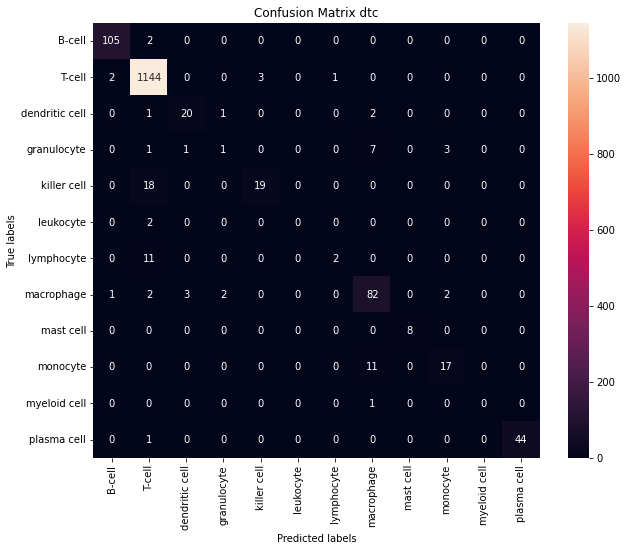

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

# 6. Predict Test Data (random 30% subset)

### import data

In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip
  inflating: subset_30.csv           


In [ ]:
df = pd.read_csv('subset_30.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified)
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified)
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_type'].value_counts()}), pd.DataFrame({'percentage': df['cell_type'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
T-cell,24926,0.765611
B-cell,2158,0.066284
macrophage,1823,0.055994
plasma cell,885,0.027183
killer cell,756,0.023221
monocyte,655,0.020119
dendritic cell,597,0.018337
lymphocyte,271,0.008324
granulocyte,243,0.007464
mast cell,147,0.004515


### split data

In [ ]:
X_test = df.drop(columns=['cell_state', 'cell_type'])
y_test = df['cell_type']

### predict data

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_12classes_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  94.99
F1 weighted of logistic regression model :  94.3
F1 macro of logistic regression model :  63.53


In [ ]:
y_pred

array(['T-cell', 'T-cell', 'T-cell', ..., 'T-cell', 'T-cell', 'T-cell'],
      dtype=object)

In [ ]:
# save predictions
pd.DataFrame(y_pred).to_csv('prediction_12classes_unbalanced_subset30.csv', index=False)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        B-cell       0.98      0.98      0.98      2158
        T-cell       0.97      0.99      0.98     24926
dendritic cell       0.87      0.79      0.83       597
   granulocyte       0.51      0.19      0.28       243
   killer cell       0.81      0.49      0.61       756
     leukocyte       0.53      0.13      0.21        68
    lymphocyte       0.60      0.11      0.18       271
    macrophage       0.81      0.91      0.86      1823
     mast cell       0.99      0.91      0.95       147
      monocyte       0.81      0.76      0.78       655
  myeloid cell       0.00      0.00      0.00        28
   plasma cell       0.95      0.97      0.96       885

      accuracy                           0.95     32557
     macro avg       0.74      0.60      0.64     32557
  weighted avg       0.94      0.95      0.94     32557



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2113,    29,     1,     0,     0,     4,     0,     0,     0,
            0,     0,    11],
       [   19, 24731,     2,     3,    87,     1,    18,    41,     0,
            0,     0,    24],
       [    4,    29,   470,     8,     0,     0,     0,    83,     0,
            2,     1,     0],
       [    0,     3,    10,    47,     0,     0,     0,    94,     0,
           89,     0,     0],
       [    1,   382,     1,     0,   371,     0,     0,     1,     0,
            0,     0,     0],
       [   12,    32,     1,     0,     2,     9,     0,    12,     0,
            0,     0,     0],
       [    0,   242,     0,     0,     0,     0,    29,     0,     0,
            0,     0,     0],
       [    2,    54,    51,    16,     0,     0,     0,  1666,     1,
           27,     1,     5],
       [    0,     8,     0,     0,     0,     0,     0,     4,   134,
            0,     0,     1],
       [    0,     8,     2,    17,     0,     0,     0,   130,     0,
          498,     0

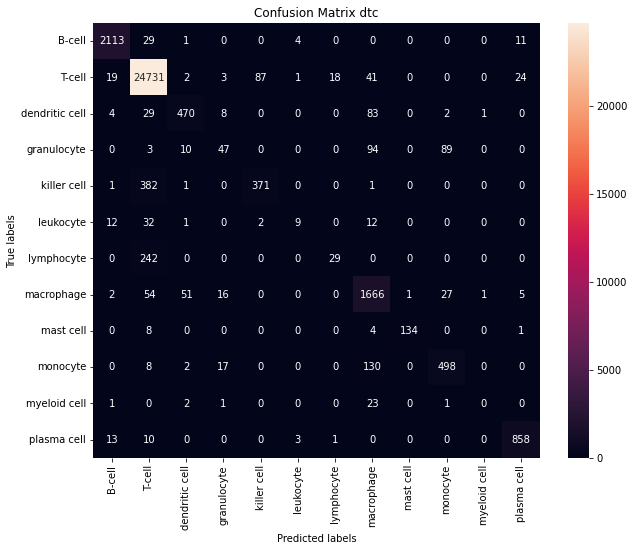

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_test)); ax.yaxis.set_ticklabels(np.unique(y_test));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()